In [1]:
# Imports

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting

# Load data

In [2]:
# load data 
df_iris = pd.read_csv("../../data/Iris.csv")

df_iris.drop(columns=["Id"], inplace=True)

# sanity check
df_iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check data structure and types
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Plot data for a better understanding

Plotting the data leads to a better understanding. The second plot was also used for the start into the workshop.


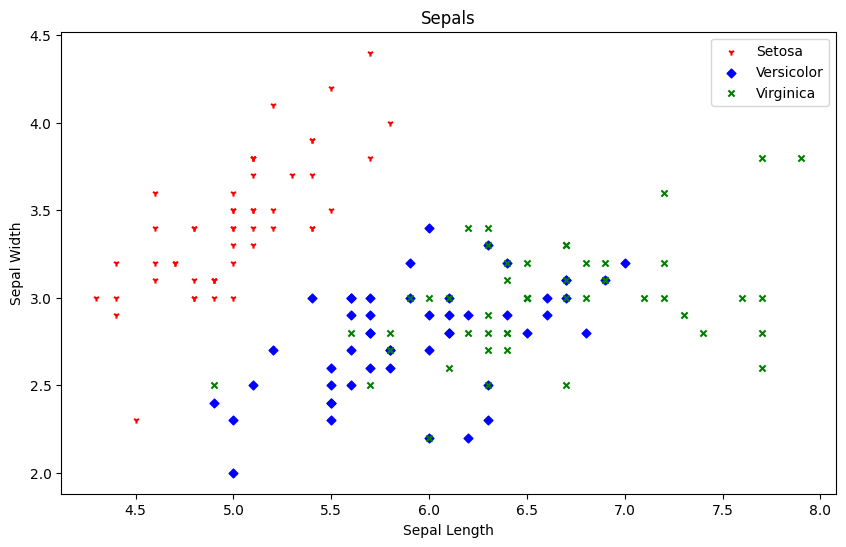

In [4]:
fig = df_iris[df_iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa', marker = "1")

df_iris[df_iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Versicolor',ax=fig, marker = "D")
df_iris[df_iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='Virginica', ax=fig, marker = "x")

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepals")

fig=plt.gcf()
fig.set_size_inches(10,6)

plt.show()

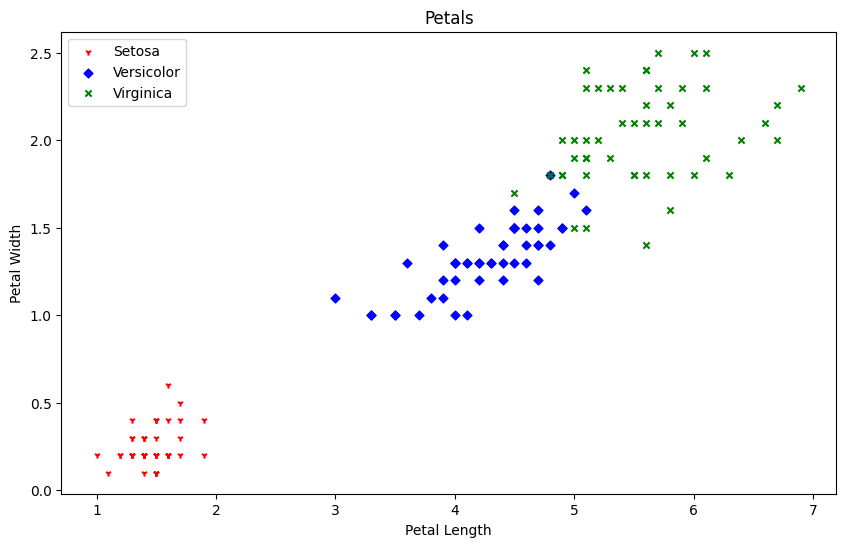

In [5]:
fig = df_iris[df_iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red', label='Setosa', marker = "1")

df_iris[df_iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Versicolor',ax=fig, marker = "D")
df_iris[df_iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='Virginica', ax=fig, marker = "x")

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petals")

fig=plt.gcf()
fig.set_size_inches(10,6)

plt.show()

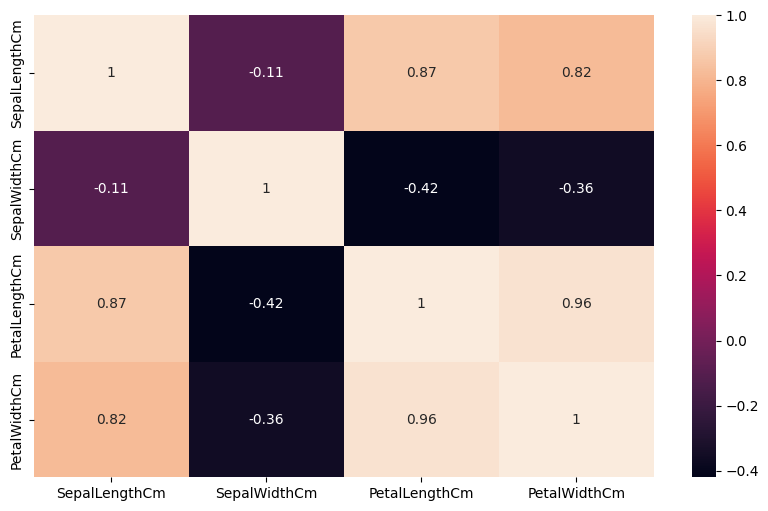

In [18]:
# Heatmap of Correlation matrix to get a better understandig of connections in the data

plt.figure(figsize=(10,6))
sns.heatmap(df_iris.corr(numeric_only=True),annot=True) 
plt.show()

As seen in the plotted data: The longer the petals, the wider they get. This is not true for the Sepals.
Also there seems to be a strong correlation between Petal size and Sepal length.

Sepal width does not strongly correlate with another feature.

# Prepare the data for training

In [8]:
# importing all the necessary packages to use the classification algorithms

from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy

In [9]:
# split into train and test set
# test_size = 0.2 uses a random sample of 20% as a test set for validation

df_train, df_test = train_test_split(df_iris, test_size = 0.2, random_state=1)

In [10]:
# it is important, to not have the result leak into the dataset. Therefore we split every dataset into X (Features) and Y (result)
df_train_x = df_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df_train_y = df_train.Species

df_test_x = df_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df_test_y = df_test.Species

# Train and test

We use a Support Vector Machine (svm) or as this is a classification task a Support Vector Classifier (svc) as it does the same we did in the intro-task. It calculates a line between the classes

For training, we split the data into 2 sets. A training set and a test set. We use the training set to train the algorithm. Then we feed in the test set and observe, how good the model performs.

In [11]:


# Build an instance of the Support Vector Machine
model = svm.SVC(random_state=1) 
model.fit(df_train_x,df_train_y) # we train the algorithm with the training data (x) and the results (y)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


We use the model to predict the calsses of the test data. Then we compare that to the true classes of the test set.

In [19]:

df_prediction=model.predict(df_test_x)
svc_accuracy = metrics.accuracy_score(df_prediction,df_test_y)
svc_accuracy

0.9666666666666667

The model labels around 97% of the test data correctly. Let's look into, where the label is used wrongly.

For that deeper dive into the labels, a confusion matrix is the tool to use. This matrix shows, what every flower of the test set is truely labeled and how the model labeled it.

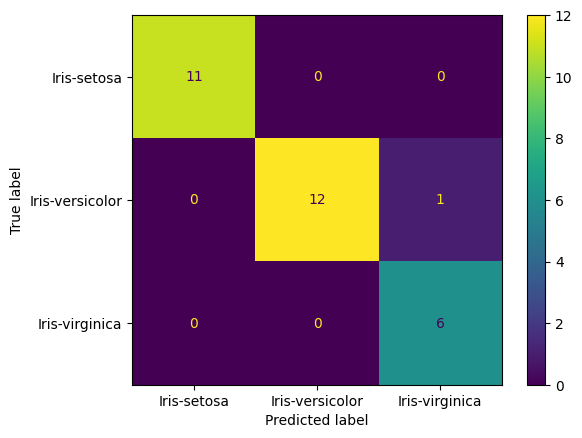

In [ ]:
# Diving into the exact mistakes of the model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df_test_y, df_prediction, labels = model.classes_)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)

cm_display.plot()

plt.show()